In [6]:
import sys
import os
import random
sys.path.append(os.path.abspath('../'))

In [7]:
import networkx as nx

from Classes.BiasedInfluenceGraph import *
from Classes.WordGenerator import *

# Opinion Evolution in network with bias function in R and M

In [8]:
# -------------- Define dictionaries to store unique values for each pair of nodes -------------
# Unique sigma value for each pair
sigma_values = {}

back_values = {}

# Unique influence value for each pair
influence_values = {}

def get_unique_random_sigma_for_pair(e):
    if e not in sigma_values:
        sigma_values[e] = random.uniform(0.001, 4)
    return sigma_values[e]

def get_unique_random_back_for_pair(e):
    if e not in back_values:
        back_values[e] = -1 * random.uniform(1, 2)
    return back_values[e]

def get_unique_random_influence_for_pair(e):
    if e not in influence_values:
        influence_values[e] = random.uniform(0, 1)
    return influence_values[e]

def get_unique_random_influence_consensus_for_pair(e):
    if e not in influence_values:
        try:
            s = sigma_values[e]
            influence_values[e] = random.uniform(0, 1 / s) if s >= 1 else random.uniform(0, 1)
        except KeyError:
            influence_values[e] = random.uniform(0, 1)
    return influence_values[e]

# ------------------------- Definition of bias functions -------------------------

# I region
def ins(G,e):
    return 0

# if sigma between 0 and 1, lin is in R, else if sigma > 1, lin is in M
def lin(G, e):
    sigma = get_unique_random_sigma_for_pair(e)
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return sigma * x

# R region
def conf(G, e):
    delta = 0.01
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x*(1 + delta - abs(x))/(1+delta)

# M region
def fan(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 0 if x == 0 else x/abs(x)

# B region
def neg_lin(G, e):
    back = get_unique_random_back_for_pair(e)
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return back * x 

# B region
def backf(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return -(x ** 3)

# ------------------------- Definition of influence functions -------------------------

def random_inf(G, e):
    return get_unique_random_influence_for_pair(e)

def random_inf_consensus(G, e):
    return get_unique_random_influence_consensus_for_pair(e)

### Opinion evolution with linear bias function in R and M

True


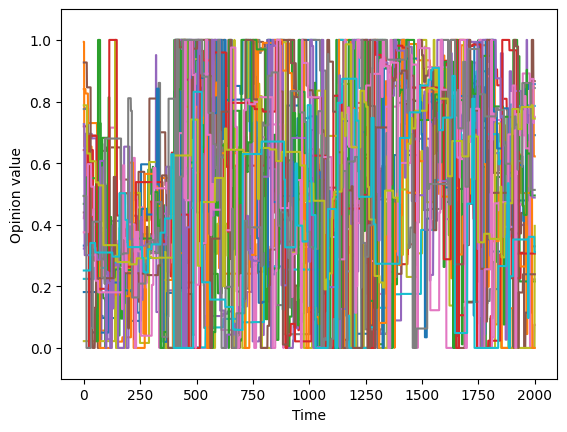

In [ ]:
n = 20
p = 0.4
B0 = []

sigma_values = {}
influence_values = {}

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf,bias_fn=lin)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()#.savefig('../images/HetNetworks/OE_lin_4.png', dpi=300) 

Opinion evolution with linear bias function in R and M. $\sigma_{ji} \cdot I_{ij} < 1$. For every $\sigma_{ji} \in (0,1)$ the condition will always fulfilled, this is for every linear function in R.

True


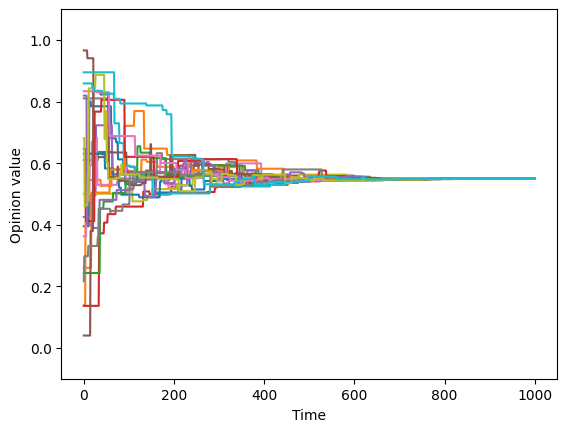

In [ ]:
n = 20
p = 0.4
B0 = []

sigma_values = {}
influence_values = {}

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf_consensus,bias_fn=lin)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()#.savefig('../images/HetNetworks/OE_lin_consensus_4.png', dpi=300) 

## Opinion evolution with linear function (Regions R and M) and ins function (I)

Erdös-Renyi Graph with a random value of $I_{ij}$ and a random bias function between $ins$ and $lin$. 

In [166]:
bias_fn = {}
influence_values = {}

def random_lin_ins(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if e not in bias_fn:
        bias_fn[e] = random.choices([lin, ins])[0]
    
    return bias_fn[e](G,e)

True


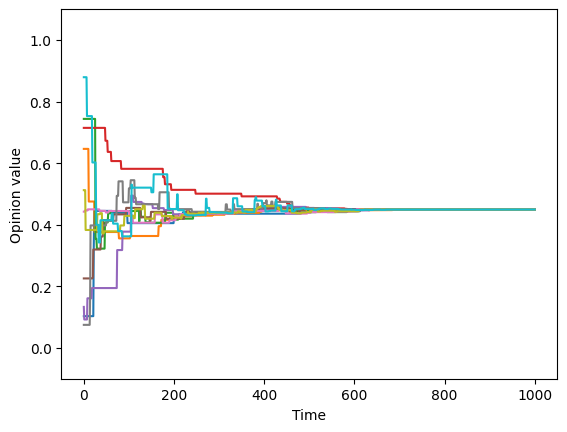

In [ ]:
n = 10
p = 0.4

bias_fn = {}
sigma_values = {}
influence_values = {}
B0 = []

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf_consensus,bias_fn=random_lin_ins)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()#.savefig('../images/HetNetworks/OE_lin_ins_4.png', dpi=300)

Creating a strongly connected graph with agents wit bias function $lin$, where $\sigma_{ji} \cdot I_{ij} < 1$. Then, we complete the graph where the missing connections will have the $ins$ bias function.

In [283]:
n = 10
p = 0.4
is_strongly_connected = False

# Create graph
while not is_strongly_connected:
    graph=nx.fast_gnp_random_graph(n, p, directed=True)
    edges = graph.edges()
    is_strongly_connected = nx.is_strongly_connected(graph)

# Generate complete graph
k = nx.complete_graph(n,create_using=nx.DiGraph)
all_edges = k.edges()

# Find missing edges
missing_edges =  list(set(all_edges) - set(edges))

In [284]:
def lin_ins(G, e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if e in missing_edges:
        sigma = get_unique_random_sigma_for_pair(e)
        return sigma * x
    else:
        return 0


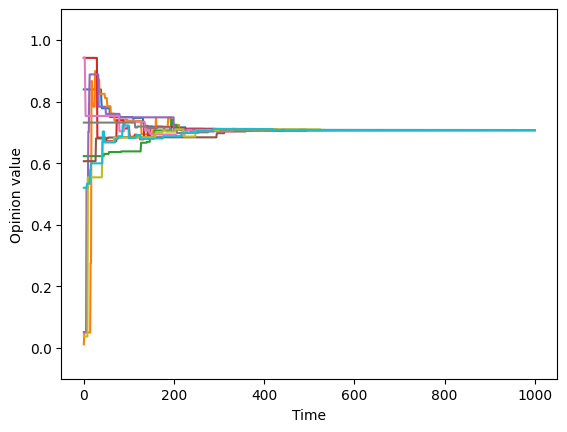

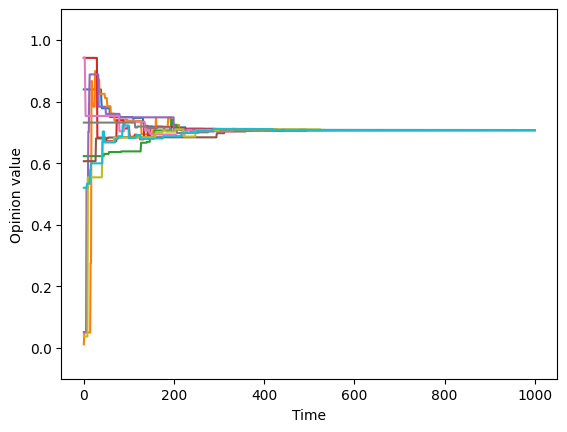

In [ ]:
sigma_values = {}
influence_values = {}

B0 = []

G = BiasedInfluenceGraph(n,G=k, ops=B0, influence_fn=random_inf_consensus,bias_fn=lin_ins)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()#.savefig('../images/HetNetworks/OE_lin_ins_consensus_4.png', dpi=300)

Runs only with $lin_{ji}$ edges to check convergence speed

In [356]:
influence_values = {(0, 1): 0.08231712734841967,
 (0, 2): 0.34850133704038877,
 (0, 3): 0.7331727475220833,
 (1, 0): 0.1628115563189667,
 (1, 2): 0.2220512167354768,
 (1, 3): 0.7989529067026697,
 (2, 0): 0.18191883019869526,
 (2, 1): 0.33217727722982815,
 (2, 3): 0.9497173715308391,
 (3, 0): 0.19339595287404954,
 (3, 1): 0.8562871711394927,
 (3, 2): 0.45632032805217626}


sigma_values = {(2,3): 0.5, (3,2): 0.5, (1,0): 0.5, (3,1): 0.5, (2,0): 2, (0,2): 2}

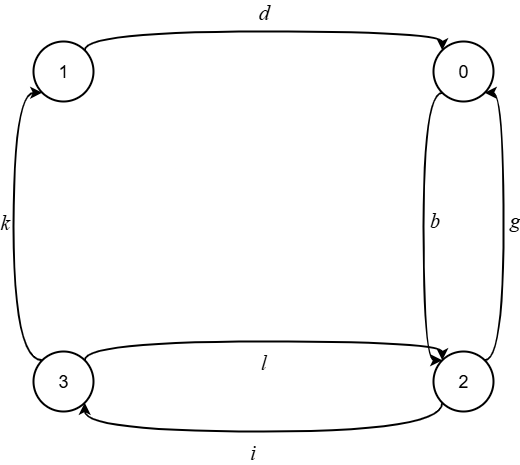

In [ ]:
#load image
from IPython.display import Image, display

# Muestra la imagen guardada en la carpeta 'images'
display(Image(filename='../images/HetNetworks/graph_lin_ins.png'))

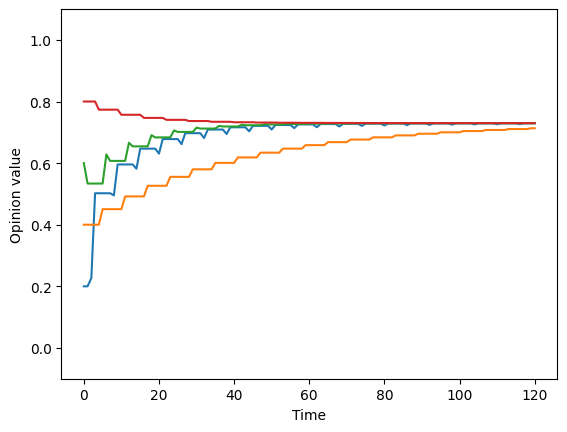

In [ ]:
node = [0,1,2,3]
edges = [(2, 3), (3, 2), (1, 0), (3, 1), (2, 0), (0, 2)]    

G = BiasedInfluenceGraph(4,G=nx.complete_graph(n,create_using=nx.DiGraph), ops=[0.2,0.4,0.6,0.8], influence_fn=random_inf_consensus,bias_fn=lin_ins)
G.execute_word("bdgikl"*20)

G.plot_opinion_evolution()#.savefig('../images/HetNetworks/OE_lin_ins_speed_1.png', dpi=300)

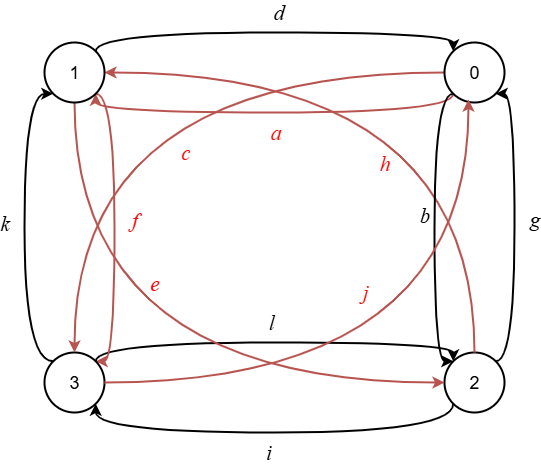

In [ ]:
#load image
from IPython.display import Image, display

# Muestra la imagen guardada en la carpeta 'images'
display(Image(filename='../images/HetNetworks/complete_graph_lin_ins.png'))

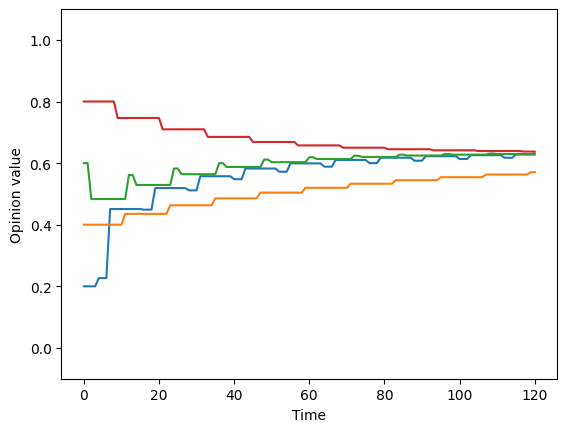

In [ ]:
node = [0,1,2,3]
edges = [(2, 3), (3, 2), (1, 0), (3, 1), (2, 0), (0, 2)]    

sigma_values = {(2,3): 0.5, (3,2): 0.5, (1,0): 0.5, (3,1): 0.5, (2,0): 2, (0,2): 2}
influence_values = {}

G = BiasedInfluenceGraph(4,G=nx.complete_graph(n,create_using=nx.DiGraph), ops=[0.2,0.4,0.6,0.8], influence_fn=random_inf_consensus,bias_fn=lin_ins)
G.execute_word("abcdefghijkl"*10)

G.plot_opinion_evolution()#.savefig('../images/HetNetworks/OE_lin_ins_speed_2.png', dpi=300)

## Opinion Evolution with bias function in all regions

In [9]:
funcs = [ins, lin, conf, fan, neg_lin, backf]

def random_bias_fun(G,e):
    if e not in bias_fn:
        bias_fn[e] = random.choices(funcs)[0]
    return bias_fn[e](G,e)

def random_lin_fun(G,e):
    if e not in bias_fn:
        bias_fn[e] = lin
    return bias_fn[e](G,e)

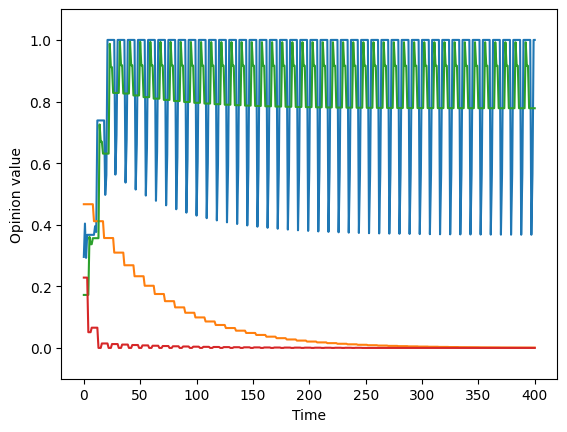

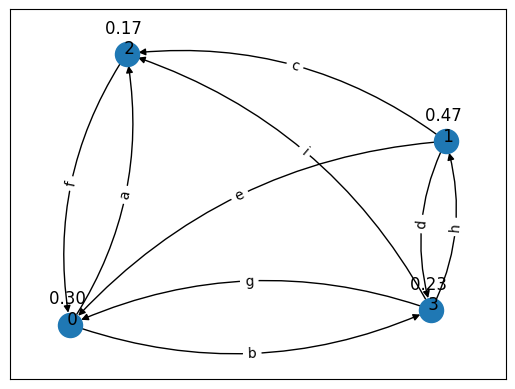

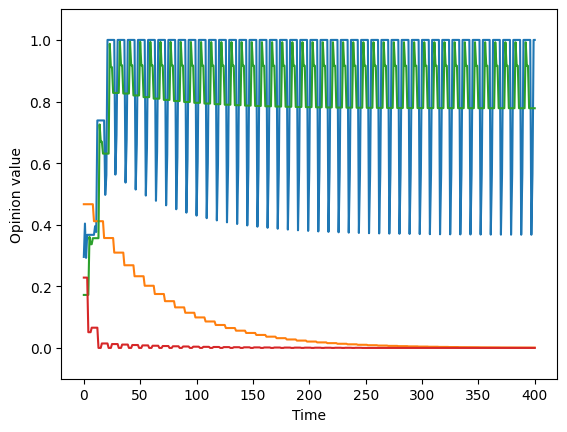

In [358]:
sigma_values = {}
influence_values = {}

n = 4
p = 0.4
is_strongly_connected = False

while not is_strongly_connected:
    graph = nx.fast_gnp_random_graph(n, p, directed=True)

    B0 = []
    rand1 = random.randint(0,n-1)
    rand2 = random.randint(0,n-1)
    rand3 = random.randint(0,n-1)
    rand4 = random.randint(0,n-1)

    while len(set([rand1, rand2, rand3, rand4])) < 4:
        rand2 = random.randint(0,n-1)
        rand3 = random.randint(0,n-1)
        rand4 = random.randint(0,n-1)

    graph.add_edge(rand1, rand2)

    bias_fn = {(rand1, rand2): neg_lin, (rand2, rand1): neg_lin, (rand3, rand2): neg_lin, (rand1, rand4):neg_lin}
    back_values = {(rand1, rand2): -1.5,(rand2, rand1): -1.5,(rand3, rand2): -1.5,(rand1, rand4):-1.5}

    is_strongly_connected = nx.is_strongly_connected(graph)

G = BiasedInfluenceGraph(n,G=graph, ops=B0, influence_fn=random_inf_consensus,bias_fn=random_lin_fun)
G.draw()

w = generate_kfair_word(G, 100*n, G.number_of_edges())
G.execute_word(w)
G.plot_opinion_evolution()

Including agents with bias function in B it will be necessary a connection that will make opinion values get closer over time

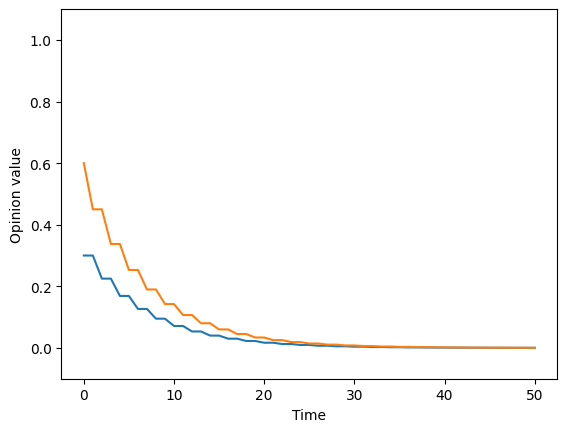

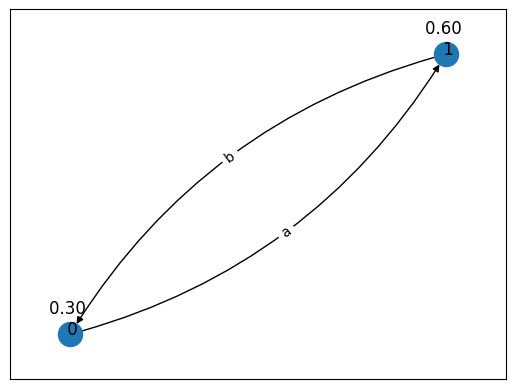

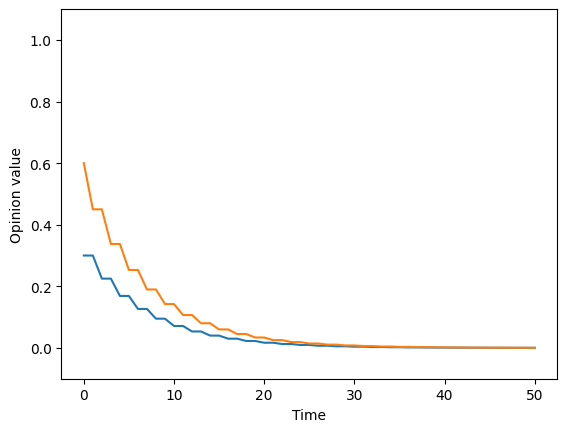

In [656]:
bias_fn = {(0,1): lin, (1,0): neg_lin}
sigma_values = {(0,1): 1}
back_values = {(1,0): -1}
influence_values = {(0,1): 0.5, (1,0): 0.5}

B0 = [0.3,0.6]
nodes = [0,1]
edges = [(0,1), (1,0)]

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

G = BiasedInfluenceGraph(n,G=g, ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
G.draw()

w = "ab"*25
G.execute_word(w)

G.plot_opinion_evolution()

## A mediator influenced by one agent

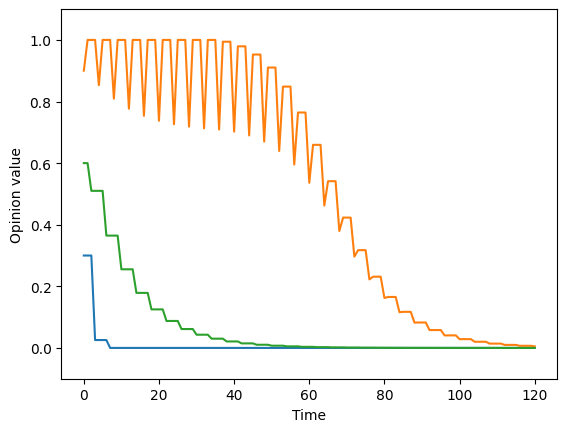

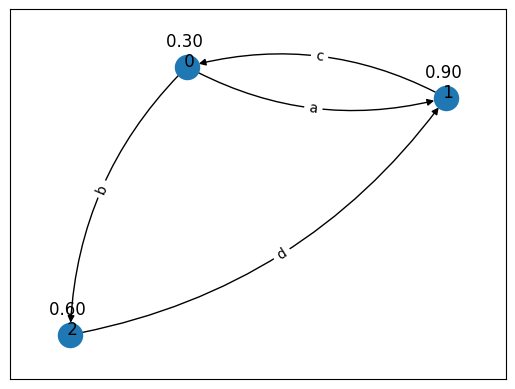

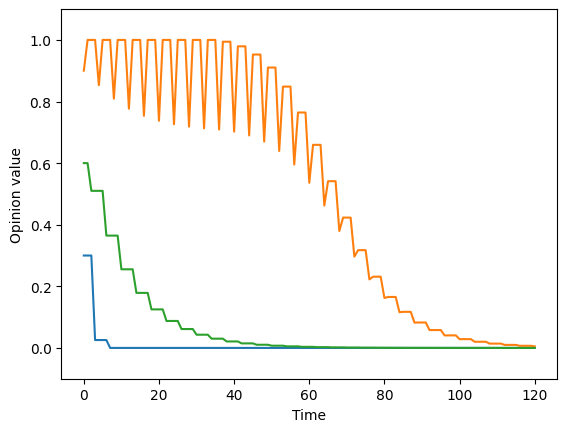

In [606]:
bias_fn = {(0,1): backf, (1,0): backf, (0,2): lin, (2,1):lin}
sigma_values = {(0,2): 0.5, (2,1):0.5}
influence_values = {(1, 0): 0.8,
 (0, 1): 0.8,
 (2, 1): 0.6,
 (0,2): 0.6}

B0 = [0.3,0.9,0.6]
nodes = [0,1,2]
edges = [(0,1), (1,0), (0,2), (2,1)]

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

G = BiasedInfluenceGraph(n,G=g, ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
G.draw()

w =  "abcd"*30
G.execute_word(w)

G.plot_opinion_evolution()

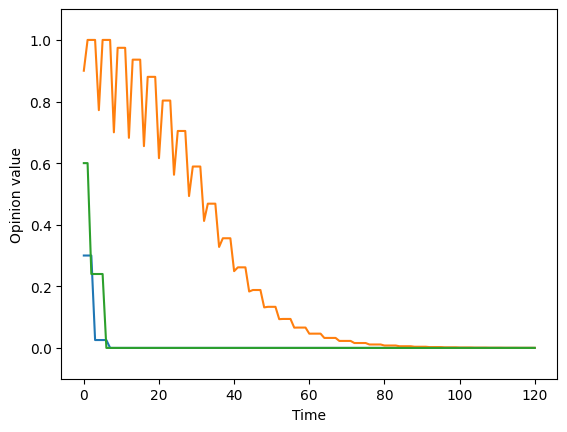

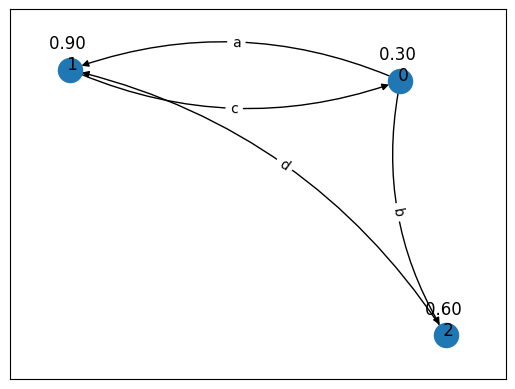

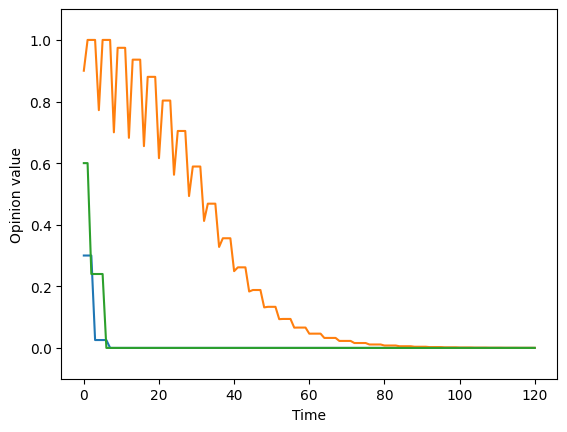

In [613]:
bias_fn = {(0,1): backf, (1,0): backf, (0,2): lin, (2,1):lin}
sigma_values = {(0,2): 2, (2,1):0.5}
influence_values = {(1, 0): 0.8,
 (0, 1): 0.8,
 (2, 1): 0.6,
 (0,2): 0.6}

B0 = [0.3,0.9,0.6]
nodes = [0,1,2]
edges = [(0,1), (1,0), (0,2), (2,1)]

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

G = BiasedInfluenceGraph(n,G=g, ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
G.draw()

w =  "abcd"*30
G.execute_word(w)

G.plot_opinion_evolution()

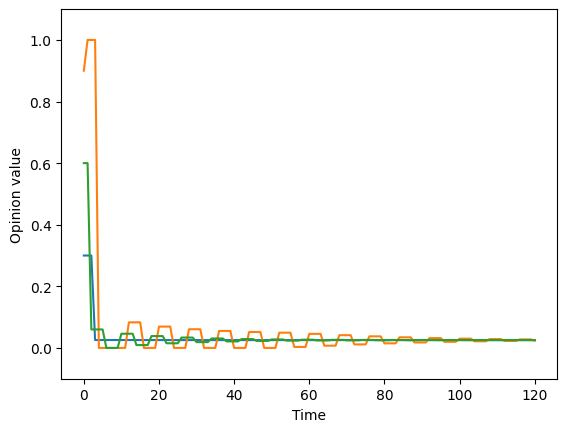

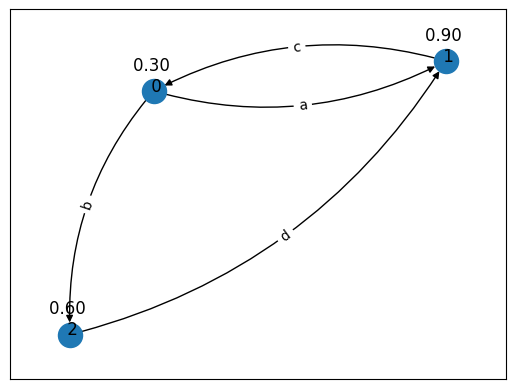

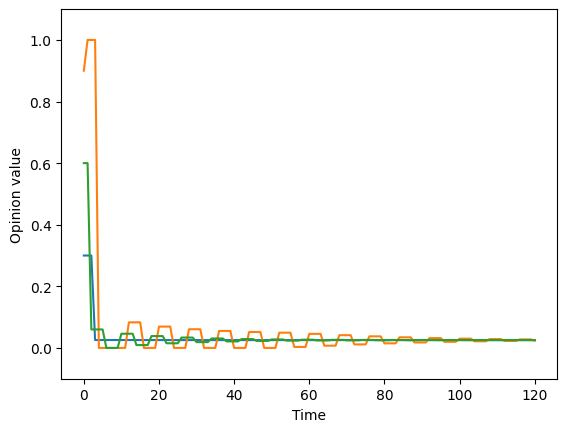

In [614]:
bias_fn = {(0,1): backf, (1,0): backf, (0,2): lin, (2,1):lin}
sigma_values = {(0,2): 2, (2,1):2}
influence_values = {(1, 0): 0.8,
 (0, 1): 0.8,
 (2, 1): 0.9,
 (0,2): 0.9}

B0 = [0.3,0.9,0.6]
nodes = [0,1,2]
edges = [(0,1), (1,0), (0,2), (2,1)]

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

G = BiasedInfluenceGraph(n,G=g, ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
G.draw()

w =  "abcd"*30
G.execute_word(w)

G.plot_opinion_evolution()

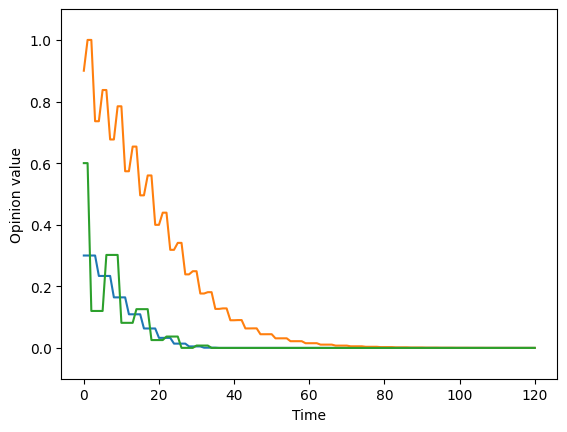

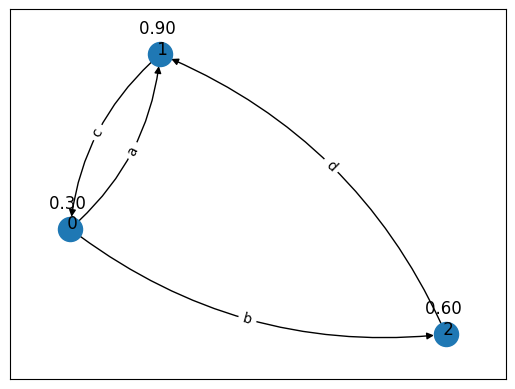

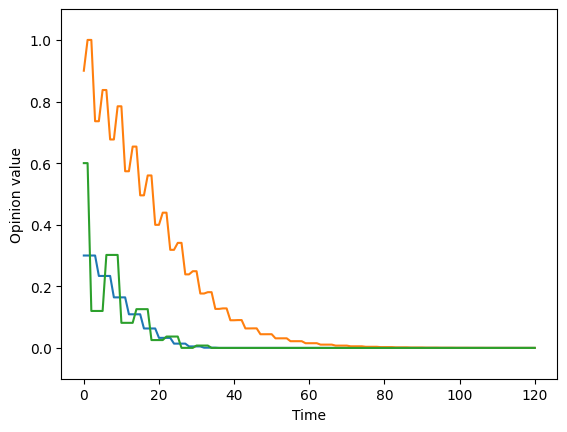

In [621]:
bias_fn = {(0,1): backf, (1,0): backf, (0,2): lin, (2,1):lin}
sigma_values = {(0,2): 2, (2,1):0.5}
influence_values = {(1, 0): 0.8,
 (0, 1): 0.8,
 (2, 1): 0.6,
 (0,2): 0.8}

B0 = [0.3,0.9,0.6]
nodes = [0,1,2]
edges = [(0,1), (1,0), (0,2), (2,1)]

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

G = BiasedInfluenceGraph(n,G=g, ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
G.draw()

w =  "abdc"*30
G.execute_word(w)

G.plot_opinion_evolution()

## A Mediator not influenced by the backfire agents

If two agents have a backfire reaction between each other, a third agent is needed as a mediator to reach consensus

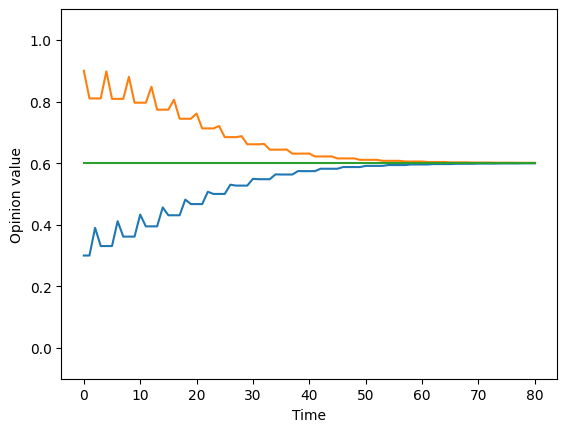

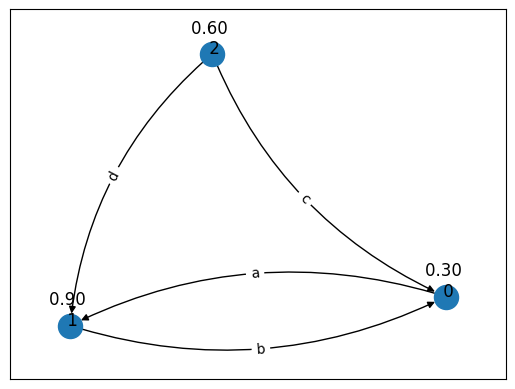

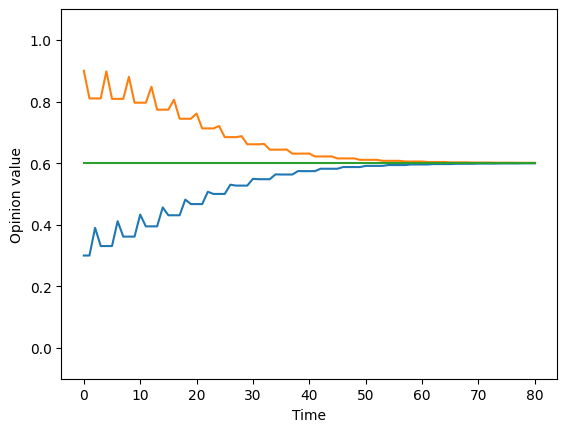

In [603]:
bias_fn = {(0,1): backf, (1,0): backf, (2,0): lin, (2,1):lin}
sigma_values = {(2,0): 0.5, (2,1):0.5}
influence_values = {(1, 0): 0.8,
 (0, 1): 0.8,
 (2, 1): 0.6,
 (2, 0): 0.6}

B0 = [0.3,0.9,0.6]
nodes = [0,1,2]
edges = [(0,1), (1,0), (2,0), (2,1)]

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

G = BiasedInfluenceGraph(n,G=g, ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
G.draw()

w =  "dcba"*20
G.execute_word(w)

G.plot_opinion_evolution()

But even with the mediator agent, the run it also important to reach consensus

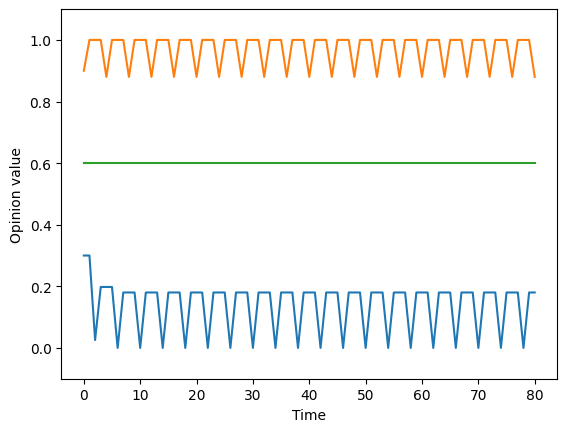

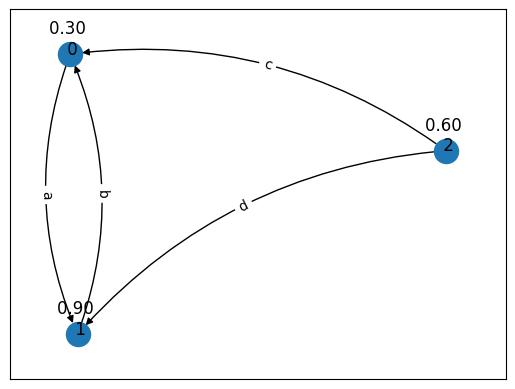

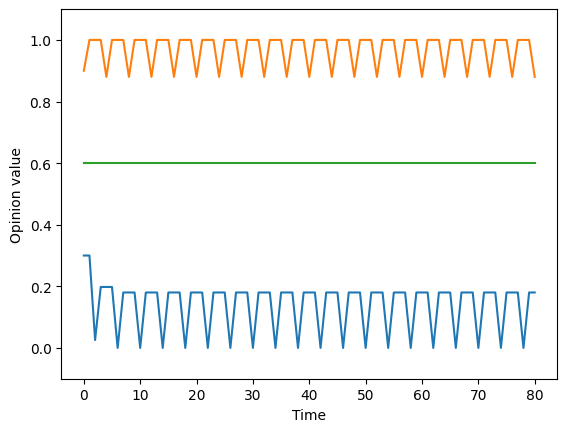

In [602]:
bias_fn = {(0,1): backf, (1,0): backf, (2,0): lin, (2,1):lin}
sigma_values = {(2,0): 0.5, (2,1):0.5}
influence_values = {(1, 0): 0.8,
 (0, 1): 0.8,
 (2, 1): 0.6,
 (2, 0): 0.6}

B0 = [0.3,0.9,0.6]
nodes = [0,1,2]
edges = [(0,1), (1,0), (2,0), (2,1)]

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

G = BiasedInfluenceGraph(n,G=g, ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
G.draw()

w =  "abcd"*20
G.execute_word(w)

G.plot_opinion_evolution()

Also, the impact of the mediator agent cannot be lower, as could not influence the others enough. Here, the influence value of the mediator agent is smaller

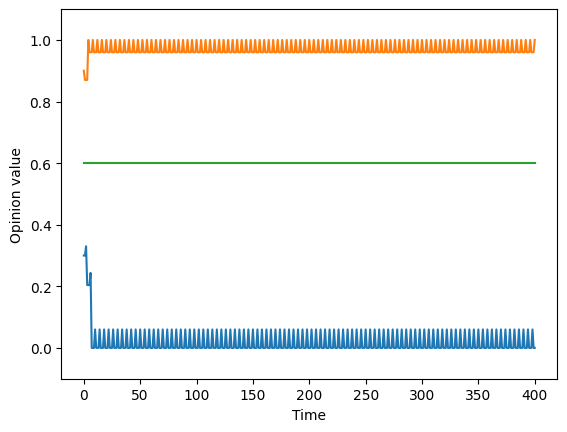

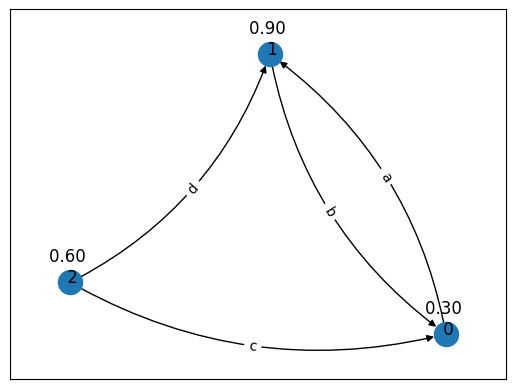

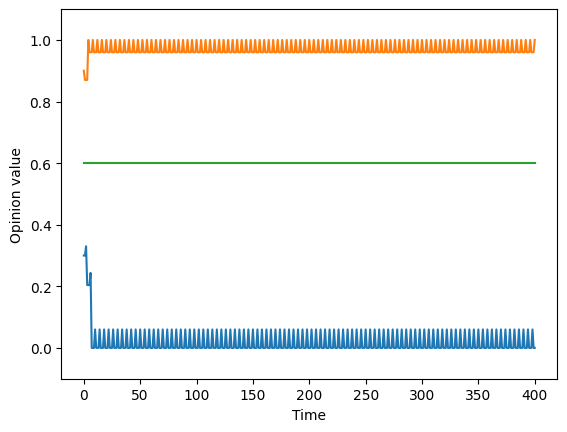

In [558]:
bias_fn = {(0,1): backf, (1,0): backf, (2,0): lin, (2,1):lin}
sigma_values = {(2,0): 0.5, (2,1):0.5}
influence_values = {(1, 0): 0.8,
 (0, 1): 0.8,
 (2, 1): 0.2,
 (2, 0): 0.2}

B0 = [0.3,0.9,0.6]
nodes = [0,1,2]
edges = [(0,1), (1,0), (2,0), (2,1)]

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

G = BiasedInfluenceGraph(n,G=g, ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
G.draw()

w =  "dcba"*100
G.execute_word(w)

G.plot_opinion_evolution()

But also the impact cannot be high enough, if the backfire agents are malleable regarding the mediator, the last could extrem ideas

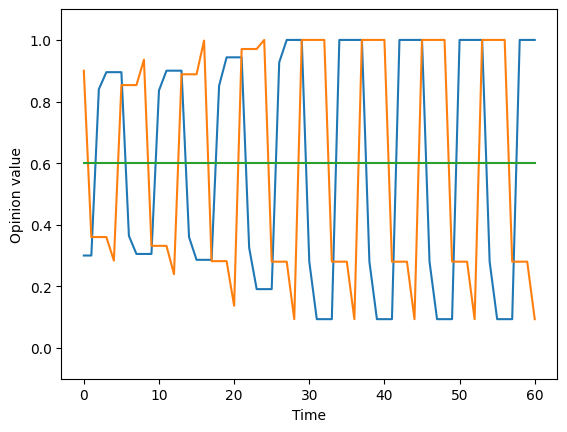

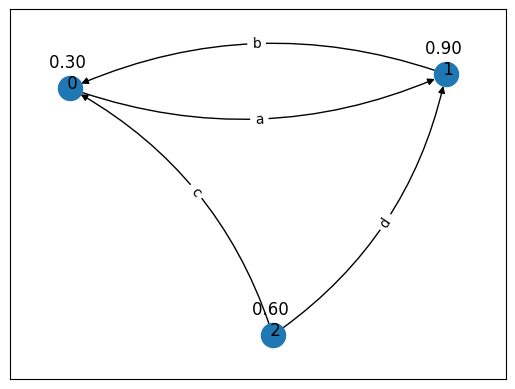

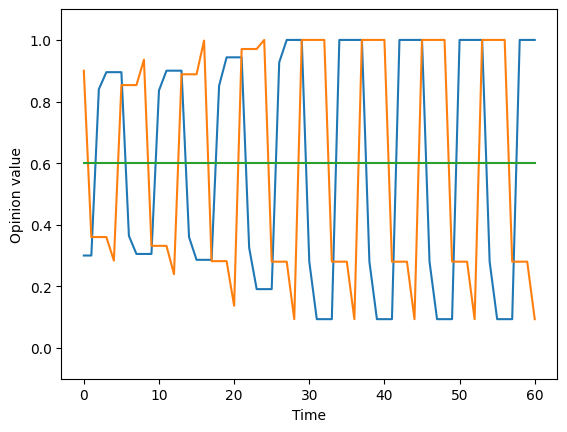

In [579]:
bias_fn = {(0,1): backf, (1,0): backf, (2,0): lin, (2,1):lin}
sigma_values = {(2,0): 2, (2,1):2}
influence_values = {(1, 0): 0.5,
 (0, 1): 0.5,
 (2, 1): 0.9,
 (2, 0): 0.9}

B0 = [0.3,0.9,0.6]
nodes = [0,1,2]
edges = [(0,1), (1,0), (2,0), (2,1)]

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

G = BiasedInfluenceGraph(n,G=g, ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
G.draw()

w =  "dcba"*15
G.execute_word(w)

G.plot_opinion_evolution()

The mediator then will be also needed to be influenciable for the backfire agents

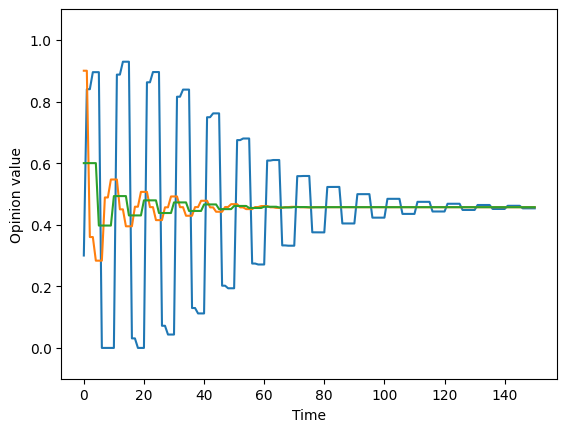

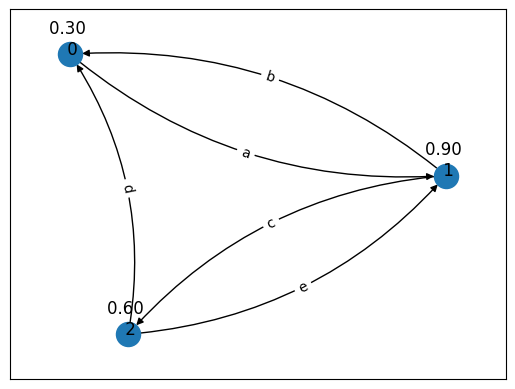

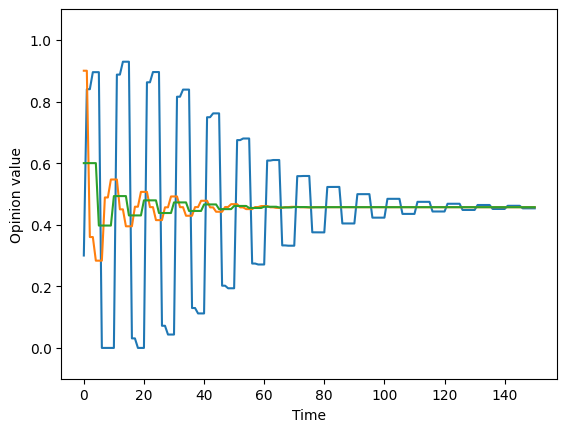

In [598]:
bias_fn = {(0,1): backf, (1,0): backf, (2,0): lin, (2,1):lin, (1,2):lin}
sigma_values = {(2,0): 2, (2,1):2, (1,2):0.8}
influence_values = {(1, 0): 0.5,
 (0, 1): 0.5,
 (2, 1): 0.9,
 (2, 0): 0.9,
 (1,2):0.8}

B0 = [0.3,0.9,0.6]
nodes = [0,1,2]
edges = [(0,1), (1,0), (2,0), (2,1),(1,2)]

g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

G = BiasedInfluenceGraph(n,G=g, ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
G.draw()

w =  "debac"*30
G.execute_word(w)

G.plot_opinion_evolution()

## Random Networks

Is not possible to guarantee consensus, due to closed-minded agents that could "break" the connectivity of the network or due to backfire agents that tends to distance their opinion from another agents

True


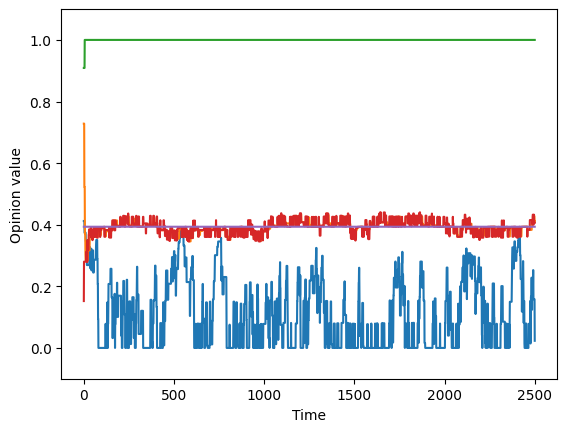

In [298]:
bias_fn = {}
sigma_values = {}
back_values = {}
influence_values = {}

B0 = []
n = 5
p = 0.4

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n,p), ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
print(nx.is_strongly_connected(G))

word_len = 500*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution().savefig('../images/HetNetworks/OE_All_regions_6.png')

In [299]:
bias_fn

{(4, 3): <function __main__.conf(G, e)>,
 (0, 3): <function __main__.ins(G, e)>,
 (3, 1): <function __main__.conf(G, e)>,
 (3, 0): <function __main__.conf(G, e)>,
 (0, 2): <function __main__.neg_lin(G, e)>,
 (3, 4): <function __main__.ins(G, e)>,
 (1, 3): <function __main__.fan(G, e)>,
 (2, 0): <function __main__.backf(G, e)>}